# Intermural Basketball Stat Analysis

## Setup

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [254]:
game1 = pd.read_csv('player_stats_vs_bears.csv')
game2 = pd.read_csv('player_stats_vs_kyle_and_friends.csv')


## Player Stats Data Frames Without the Totals

### Game 1

In [255]:
game1_nt = game1.drop(8)
game1_nt

,Name,AST,2GM,3GM,FG_Miss,FT_Made,FT_Miss,REB/BOX,BLK,STL/CHT,TOV/TECF/OFF,FTA,FGA,FGM,PT,Rating,Rank
0,Alvaro,0,4,1,5,0,2,0,0,0,2,2,10,5,30.0,3.95,2.0
1,Ben,0,0,0,0,0,0,1,0,0,2,0,0,0,24.0,-1.35,7.0
2,Conner,1,0,0,6,1,3,1,0,1,2,4,6,0,26.0,-3.95,8.0
3,Dan,0,1,0,2,0,0,0,0,0,1,0,3,1,16.0,-0.50,6.0
4,Ethan,0,0,1,3,0,0,0,0,0,0,0,4,1,20.0,1.05,5.0
5,Nick,0,2,0,3,0,0,3,0,0,2,0,5,2,NaN,1.60,3.0
6,Tyler,0,1,1,4,1,1,3,0,2,5,2,6,2,24.0,1.55,4.0
7,Walt,2,1,4,11,0,0,6,1,4,4,0,16,5,30.0,13.15,1.0


### Game 2

In [256]:
game2_nt = game2.drop(8)
game2_nt

,Name,AST,2GM,3GM,FG_Miss,FT_Made,FT_Miss,REB/BOX,BLK,STL/CHT,TOV/TECF/OFF,FTA,FGA,FGM,PT,Rating,Rank
0,Alvaro,0,3,1,5,0,0,3,0,0,2,0,9,4,24,5.10,3.0
1,Ben,0,0,0,0,0,0,1,0,0,1,0,0,0,26,-0.35,5.0
2,Conner,0,2,0,2,0,0,2,0,0,1,0,4,2,26,2.60,4.0
3,Dan,0,0,0,1,0,0,0,0,1,2,0,1,0,24,-1.65,8.0
4,Ethan,0,0,0,3,0,0,1,0,0,0,0,3,0,18,-1.30,6.0
5,Nick,0,1,0,6,0,3,5,0,0,1,3,7,1,14,-1.35,7.0
6,Tyler,0,6,0,7,0,0,7,0,3,1,0,13,6,30,12.80,2.0
7,Walt,1,0,6,6,0,2,8,0,4,3,2,12,6,32,20.20,1.0


## Free Throws

### Functions

In [257]:
# plots the Free throws in a bar graph
def plotFreeThrows(stats):    
    #data being ploted
    plt.bar(stats.Name, stats.FTA, label='Free Throws Missed', color='red')
    ftm = plt.bar(stats.Name, stats.FT_Made, label='Free Throws Made', color='green')

    #labels
    plt.title("Free Throws in Game 1")
    plt.xlabel("Player Name")
    plt.ylabel("Number of Free Throws")

    #axis ticks
    yt = np.arange(0,5,1)
    plt.yticks(yt)

    #displays the legend, we define the legend when we do plt.plot()
    plt.legend()

    #save the graph
    #plt.savefig('game1freethrows.png', dpi=300)

    return plt.show()

### Game 1

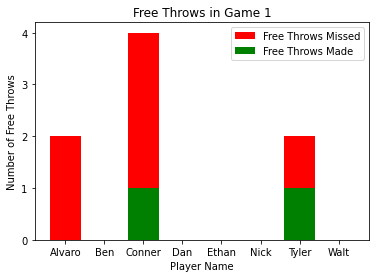

In [258]:
plotFreeThrows(game1_nt)


### Game 2

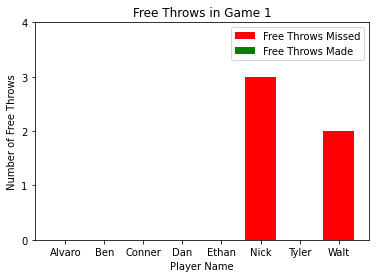

In [259]:
plotFreeThrows(game2_nt)

## Field Goals

### Functions

In [260]:
# plots the Field Goals missed and made in a bar chart
def plotFieldGoals(stats):
    #data being ploted
    plt.bar(stats.Name, stats.FGA, label='Field Goals Missed', color='red')
    plt.bar(stats.Name, stats.FGM, label='Three Pointers Made', color='green')
    plt.bar(stats.Name, stats["2GM"], label='Two Pointers Made', color='blue')

    #labels
    plt.title("Field Goals in Game 2")
    plt.xlabel("Player Name")
    plt.ylabel("Number of Field Goals")

    #displays the legend, we define the legend when we do plt.plot()
    plt.legend()

    return plt.show()

In [261]:
# Generates the field goal percentage table
def genFGP(stats):
    data = {'Name': stats.Name, 'Field Goal Percentage': (stats.FGM/stats.FGA) * 100}

    field_goal_percent = pd.DataFrame(data)
    return field_goal_percent.sort_values(by='Field Goal Percentage', ascending=False)

In [262]:
# Generates total field goal percentage
def totalFGP(stats):    
    return stats.at[8, 'FGM'] / stats.at[8, 'FGA'] * 100

### Game 1

#### *Graph*

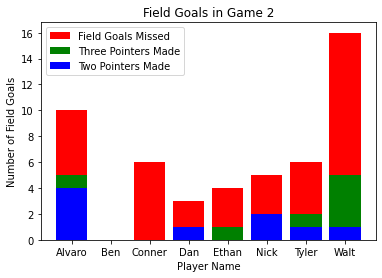

In [263]:
plotFieldGoals(game1_nt)

#### *Individual Percentages*

In [264]:
genFGP(game1_nt)

,Name,Field Goal Percentage
0,Alvaro,50.000000
5,Nick,40.000000
3,Dan,33.333333
6,Tyler,33.333333
7,Walt,31.250000
4,Ethan,25.000000
2,Conner,0.000000
1,Ben,NaN


#### *Team Percentage*

In [265]:
totalFGP(game1)

32.0

### Game 2

#### *Graph*

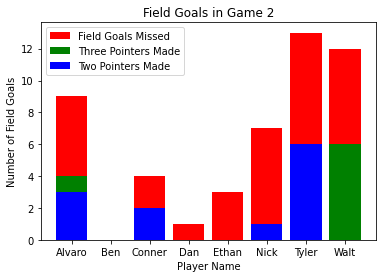

In [266]:
plotFieldGoals(game2_nt)

#### *Percentages*

In [267]:
genFGP(game2_nt)

,Name,Field Goal Percentage
2,Conner,50.000000
7,Walt,50.000000
6,Tyler,46.153846
0,Alvaro,44.444444
5,Nick,14.285714
3,Dan,0.000000
4,Ethan,0.000000
1,Ben,NaN


In [268]:
totalFGP(game2)

38.775510204081634